<a href="https://colab.research.google.com/github/iotaminus1/Playstore-and-User-Review-Data-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. 

##<b>Actionable insights can be drawn for developers to work on and capture the Android market.

## <b> Each app (row) has values for catergory, rating, size, and more. 

##<b>Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##**1. Breaking-Down Dataset**##

In [2]:
# Python 3 comes with important libraries
# importing important libraries for further analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# importing the data from the drive and reading the csv file.
df_ps_data = pd.read_csv("/content/drive/MyDrive/ALMABETTER/Modules/Topics/Capstone EDA/Play Store Data.csv")


In [5]:
# How many rows and columns we have to deal with 
df_ps_data.shape

(10841, 13)

In [6]:
df_ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# Let's see what it consists at the end of table
df_ps_data.tail() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
# let's see all the information avalaible in playstore data
df_ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# let's see what it contains in column
df_ps_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


##Details of Each Columns of playstore_df DataFrame

	
1. **App**-	The app name
2. **Category**-	Categorical label, which describes which broad category the app belongs to.
3. **Rating**-	Continuous variable with a range from 0.0 to 5.0, which describes the average rating the app has received from the users.
4. **Reviews-**	Continuous variable describing the number of reviews that the app received.
5. **Size**-	The size of the app. The suffix M is used for megabytes, while the suffix K is used for kilobytes.
6. **Installs**- Categorical label that describes the number of installs.
7. **Type**-	Label that indicates whether the app is free or paid.
8. **Price**-	The price value for the paid apps.
9. **Content**- Rating	Categorical rating that indicates the age group for which the app is suitable.
10. **Genre**-	Semicolon separated list of genres to which the app belongs.
11. **Last Update**-	The date the app was last updated.
12. **Current Version**-	The current version of the app as specified by the developers.
13. **Android Version**-	The Android operating system the app is compatible with.

##Data Cleaning

1. It is important to be able to deal with messy data, whether that means missing values, inconsistent formatting, malformed records, or nonsensical outliers.


We’ll cover the following:

1. Dropping unnecessary columns in a DataFrame
2. Changing the index of a DataFrame
3. Checking duplicate data
4. Checking NaN values and filling it with mode of the column data
5. Skipping unnecessary rows in a CSV file

In [10]:
#identifying the app with NaN type
df_ps_data[df_ps_data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [11]:
# After checking NaN value and cross checking the playstore app the type='Free'
df_ps_data['Type'].fillna("Free", inplace=True)

In [12]:
#identifying the app with content rating NaN type
df_ps_data[df_ps_data['Content Rating'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


##As we can see there is an error in Row 10472, so we drop it

In [13]:
#Removing the row which contain error
df_ps_data = df_ps_data.drop(10472)

In [14]:
df_ps_data.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [15]:
df_ps_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [16]:
#Taking mode value of Rating column 
df_ps_data_mode=df_ps_data['Rating'].mode()
print(df_ps_data_mode)

0    4.4
dtype: float64


In [17]:
##replacing the NaN value of rating column with mode values
df_ps_data['Rating'].fillna(value=df_ps_data_mode[0],inplace=True)

In [18]:
df_ps_data_mode=df_ps_data['Current Ver'].mode()
print(df_ps_data_mode)
df_ps_data['Current Ver'].fillna(value=df_ps_data_mode[0],inplace=True)

0    Varies with device
dtype: object


In [19]:
df_ps_data_mode=df_ps_data['Android Ver'].mode()
print(df_ps_data_mode)
df_ps_data['Android Ver'].fillna(value=df_ps_data_mode[0],inplace=True)

0    4.1 and up
dtype: object


In [20]:
df_ps_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [21]:
## Checking the duplicacy of the same app
boolean = df_ps_data['App'].duplicated().any()
boolean

True

##Now Checking and Removing the duplicate apps from given data

In [22]:
df_ps_data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [23]:
df_ps_data[df_ps_data['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


**As we can see from the above dataframe, ROBOLOX app is having identical rows with the reviews and category. It may have happened that for the same app, the data has been scrapped in different points of time. so we have to keep the row of an app with maximum numner of reviews, assuming it to be latest one.**

In [24]:
#droping the duplicate data 
df_ps_data.drop_duplicates(subset='App',inplace=True)

In [25]:
df_ps_data['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
CK Call NEW                                       1
Ck Coif                                           1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9659, dtype: int64

**Now, we need to convert the data types with their respective actual type Reviews, Size, Installs, & Price should have an integer or float datatype, But here we can see of object type, So let's convert them to their respective type.**

In [26]:
# Data Cleaning for "Price column"
df_ps_data['Price'] = df_ps_data['Price'].apply(lambda x: x.replace('$',''))
df_ps_data['Price'] = df_ps_data['Price'].astype(float)

In [27]:
# Data cleaning for "Install column"
df_ps_data['Installs'] = df_ps_data['Installs'].apply(lambda x : x.replace(',',''))
df_ps_data['Installs'] = df_ps_data['Installs'].apply(lambda x : x.strip('+'))
df_ps_data['Installs'] = df_ps_data['Installs'].astype(int)

In [28]:
df_ps_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [29]:
# Data cleaning for "Size column"
df_ps_data['Size'] = df_ps_data.Size.str.replace("M","000")
df_ps_data['Size'] = df_ps_data.Size.replace("Varies with device",np.nan)
df_ps_data['Size'] = df_ps_data.Size.str.replace("k","")
df_ps_data['Size'] = df_ps_data['Size'].astype(float)

In [30]:
df_ps_data.dropna(subset=['Size'], inplace=True)

In [31]:
#Data cleaning for "Reviews column"
df_ps_data['Reviews'] = df_ps_data['Reviews'].astype(float)

In [32]:
#Data Cleaning for Curreent Ver and Android Ver
df_ps_data['Current Ver'].fillna(str(df_ps_data['Current Ver'].mode().values[0]),inplace=True)
df_ps_data['Android Ver'].fillna(str(df_ps_data['Android Ver'].mode().values[0]),inplace=True)


In [33]:
df_ps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8432 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8432 non-null   object 
 1   Category        8432 non-null   object 
 2   Rating          8432 non-null   float64
 3   Reviews         8432 non-null   float64
 4   Size            8432 non-null   float64
 5   Installs        8432 non-null   int64  
 6   Type            8432 non-null   object 
 7   Price           8432 non-null   float64
 8   Content Rating  8432 non-null   object 
 9   Genres          8432 non-null   object 
 10  Last Updated    8432 non-null   object 
 11  Current Ver     8432 non-null   object 
 12  Android Ver     8432 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 922.2+ KB


In [34]:
df_ps_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [35]:
df_ps_data.describe()

,Rating,Reviews,Size,Installs,Price
count,8432.00000,8.432000e+03,8432.000000,8.432000e+03,8432.000000
mean,4.20051,1.206553e+05,18372.195837,3.724212e+06,1.225972
std,0.51817,9.363450e+05,23292.236057,2.482940e+07,18.028685
min,1.00000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.00000,1.700000e+01,5.300000,1.000000e+03,0.000000
50%,4.40000,4.755000e+02,12000.000000,5.000000e+04,0.000000
75%,4.50000,1.566725e+04,28000.000000,1.000000e+06,0.000000
max,5.00000,4.489172e+07,100000.000000,1.000000e+09,400.000000


## Reading the User review Data from the drive and seeing it for further analysis.

In [36]:
df_user_rew = pd.read_csv("/content/drive/MyDrive/ALMABETTER/Modules/Topics/Capstone EDA/User Reviews.csv")

In [37]:
df_user_rew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [38]:
df_user_rew.shape

(64295, 5)

In [39]:
df_user_rew.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [40]:
df_user_rew.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [41]:
df_user_rew.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [42]:
df_user_rew = df_user_rew[df_user_rew['Translated_Review'].notna()]

In [43]:
df_user_rew.shape

(37427, 5)

In [44]:
df_user_rew.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [45]:
df_user_rew.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


##Explanatry Data Analysis

**Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.**

##Question-1:(a) Finding Top apps in playstore as per Category

In [46]:
top_category = df_ps_data.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
category_installs = df_ps_data.groupby(['Category'])[['Installs']].sum()

In [47]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top categories on Playstore')

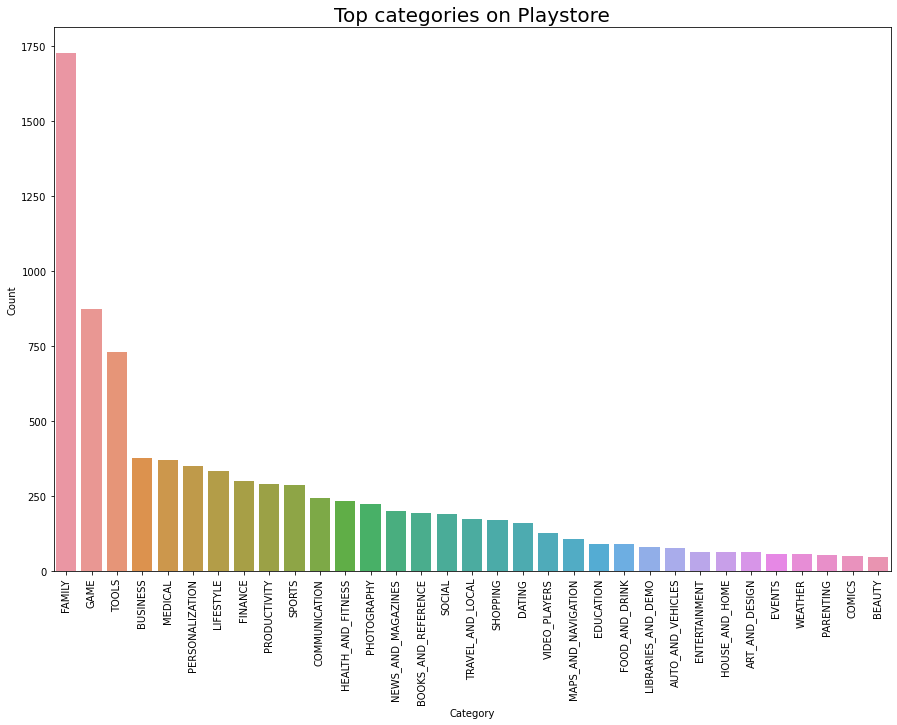

In [48]:
plt.figure(figsize=(15,10))
plt.xlabel("Category")
plt.ylabel("Number of Application")
plt.xticks(rotation=90)
sns.barplot(top_20_category_installs.Category,top_20_category_installs.Count)
plt.title("Top categories on Playstore", fontsize = 20)

**Obervation 1- As we can see that in Category section 'Family', 'Games','Tools' winning the race. So this Data will give us brief the daily requirements of users.**

In [49]:
top_genres = df_ps_data.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = df_ps_data.groupby(['Genres'])[['Installs']].sum()

In [50]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


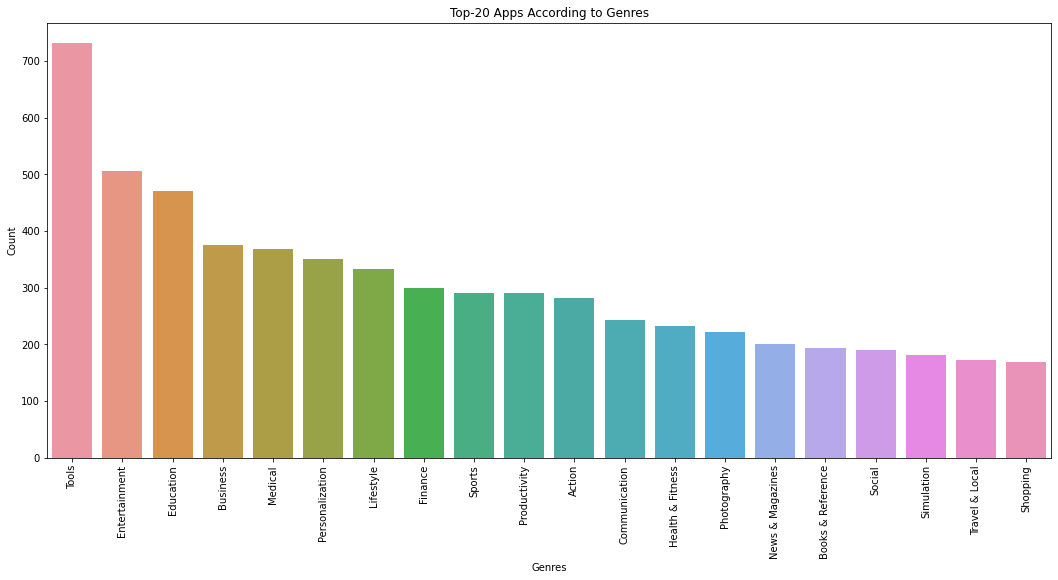

In [78]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of Application")
plt.title("Top-20 Apps According to Genres")
sns.barplot(top_20_genres_installs.Genres,  top_20_genres_installs.Count)
plt.show()

##Question-1: (b)Finding Top apps in playstore as per Genres

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


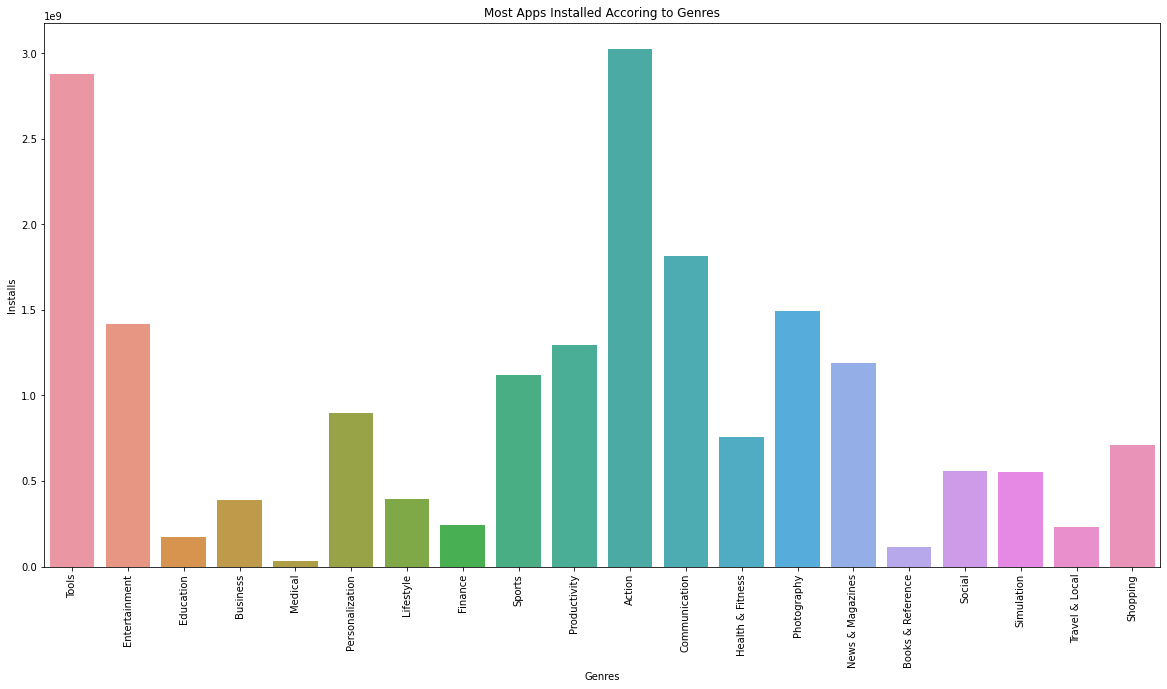

In [52]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Most Apps Installed Accoring to Genres")
sns.barplot(top_20_genres_installs.Genres,  top_20_genres_installs.Installs)
plt.show()

**Obsevation 1(b)-By plotting the graph of Top Genres it is clear that the 'Tools','Entertainment','Action' topping the chart.**

**Observation-1(c)**:**By comparing the Category & Genres section we clearly see that the topping section of both plot is entirely different**

In [53]:
top_20_genres_installs.Installs

0     2881094815
1     1417459679
2      170587098
3      386428560
4       31589617
5      895179772
6      394600839
7      244623484
8     1122349498
9     1296312744
10    3025939040
11    1817943051
12     756461912
13    1493897655
14    1191005650
15     114962076
16     558264802
17     555476820
18     228566146
19     710748785
Name: Installs, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


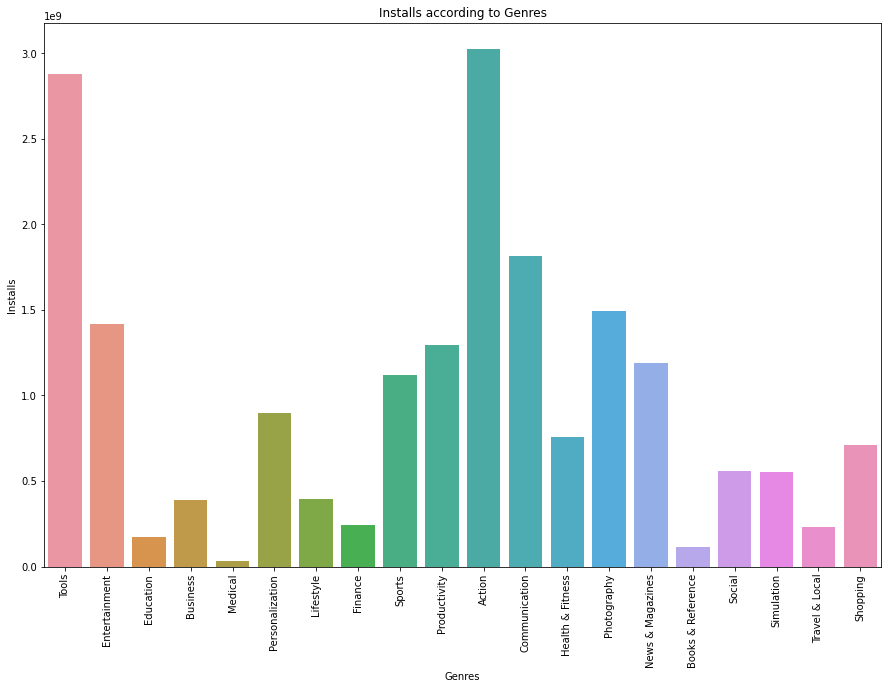

In [54]:
# Now checking the Genres that are getting installed most in Top-20 Genres
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres,top_20_genres_installs.Installs)
plt.show()

**Observation 1(c)**-**Thus the Top-20 Genres and Apps getting installed in each Genres depicts a contrasting story.**

##Question-2(a): Checking the proportion of Free and Paid Apps

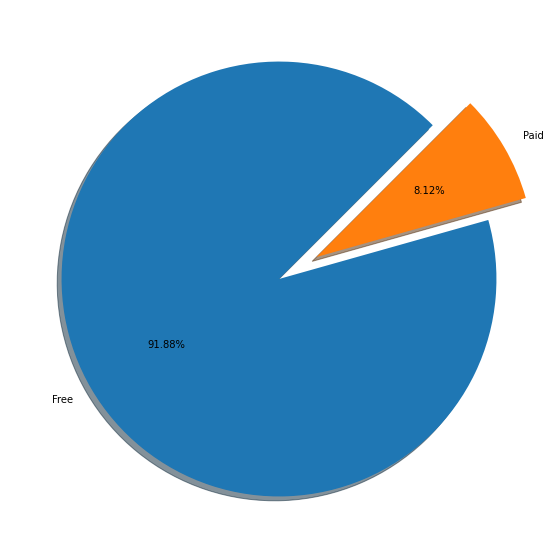

In [55]:
plt.figure(figsize=(15,10))
x=df_ps_data.Type.value_counts()
label=["Free","Paid"]
plt.pie(x,labels=label,autopct="%1.2f%%",shadow=True, explode=[0, 0.2], startangle=45)
plt.show()

**Observation 2(a)-** **From above Pie chart we can clearly see that majority of apps are free**

##Question-2: (b)Content Rating Ratios from all apps

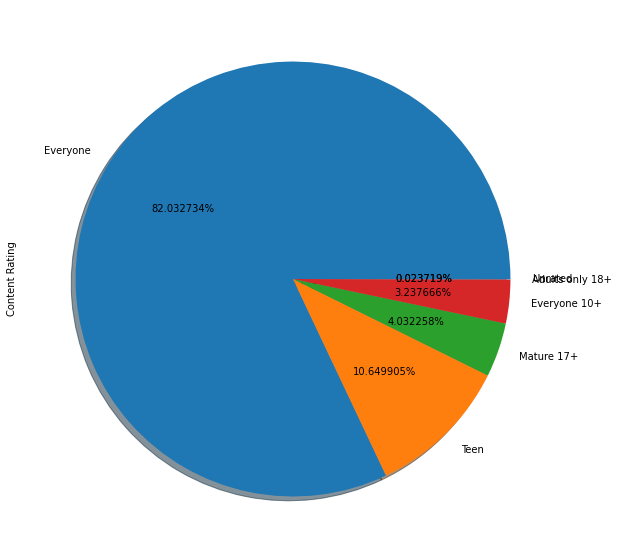

In [56]:
plt.figure(figsize=(10,10))
pd.value_counts(df_ps_data["Content Rating"]).plot(kind = 'pie',  autopct='%1f%%', shadow=True)
plt.show()

**Observation 2(b)-** **The Majority Content of Apps in Playstore are everyone thus, installing a user-friendly environment**

##Question-2: (c)Content Rating in Free and Paid Apps

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


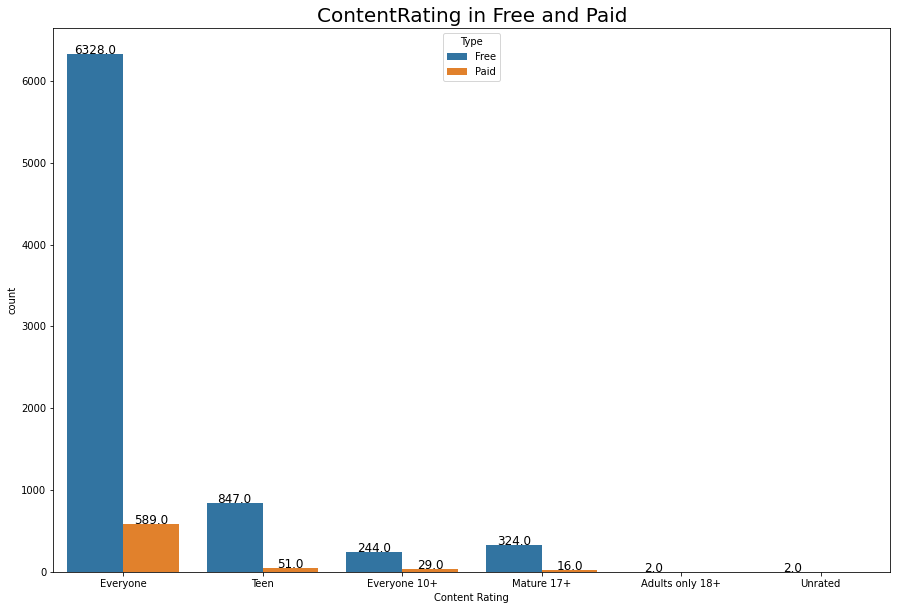

In [57]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df_ps_data['Content Rating'],hue=df_ps_data['Type']);
plt.title("ContentRating in Free and Paid",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()


**Question-3: Now checking the distribution of apps in terms of Size, Rating & Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


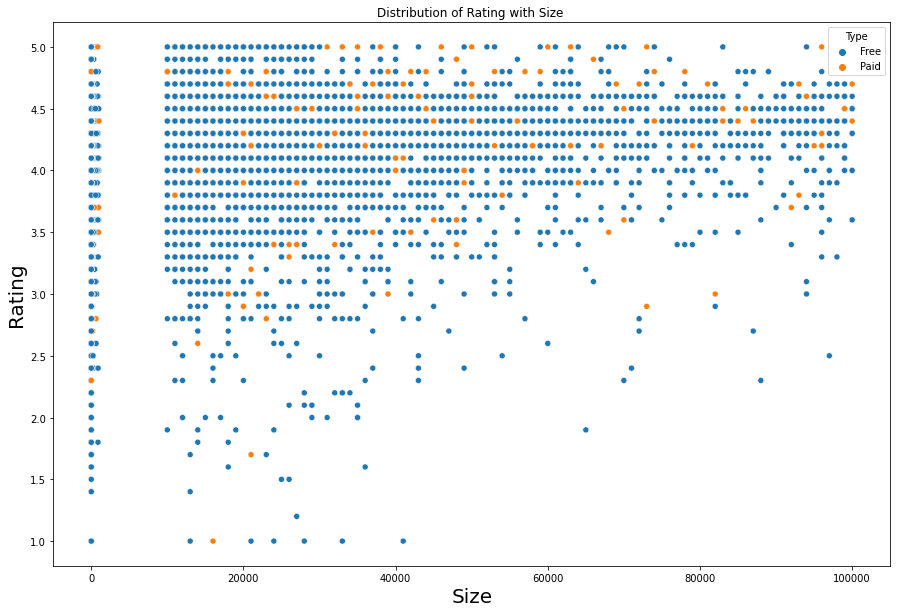

In [58]:
plt.figure(figsize=(15,10))
sns.scatterplot(df_ps_data['Size'],df_ps_data['Rating'],hue=df_ps_data['Type'])
plt.xlabel("Size",fontsize=20)
plt.ylabel("Rating",fontsize=20)
plt.title("Distribution of Rating with Size ")
plt.show()

**Observation 3- From above scatter plot, we can imply that majority of free apps are small in size and having high rating. While paid apps have quite equal distribution in terms of size and rating.**


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


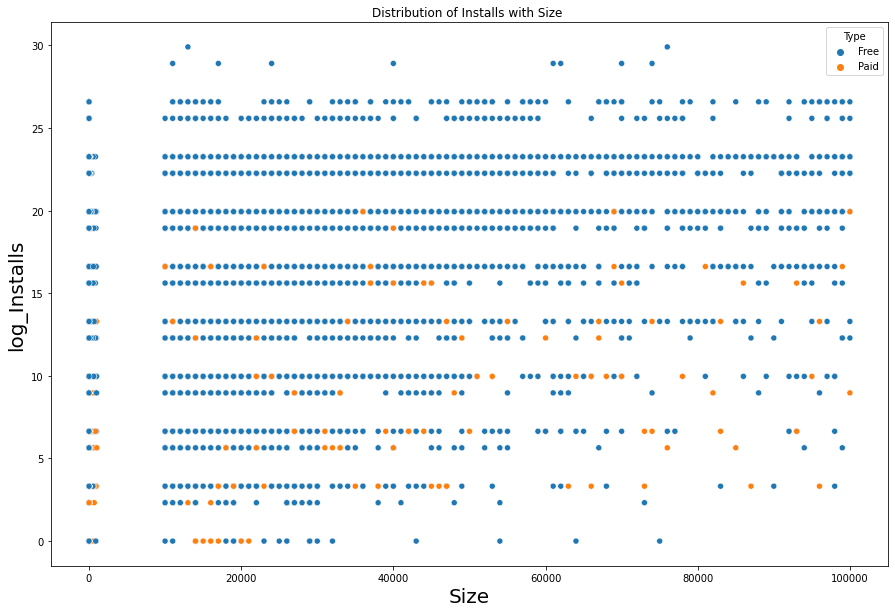

In [59]:
##As we can notice,there is a high variance in the number of installs. 
##To remove this we are adding a new column to dataframe, which is the log of number of installs'''
df_ps_data['log_installs'] = np.log2(df_ps_data['Installs'])

plt.figure(figsize=(15,10))
sns.scatterplot(df_ps_data['Size'],df_ps_data['log_installs'],hue=df_ps_data["Type"])
plt.xlabel("Size",fontsize=20)
plt.ylabel("log_Installs",fontsize=20)
plt.title("Distribution of Installs with Size ")
plt.show()

**Observation 3-** **Also, we can say that the bulky apps are less downloaded by user.**

**Size does effect the Rating of the Apps**

##Question-4: Let us examine the Free and Paid Apps available according to Category

In [60]:
app_count = df_ps_data.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
df_app_count = app_count.pivot('Category','Type','Count').fillna(0).reset_index()

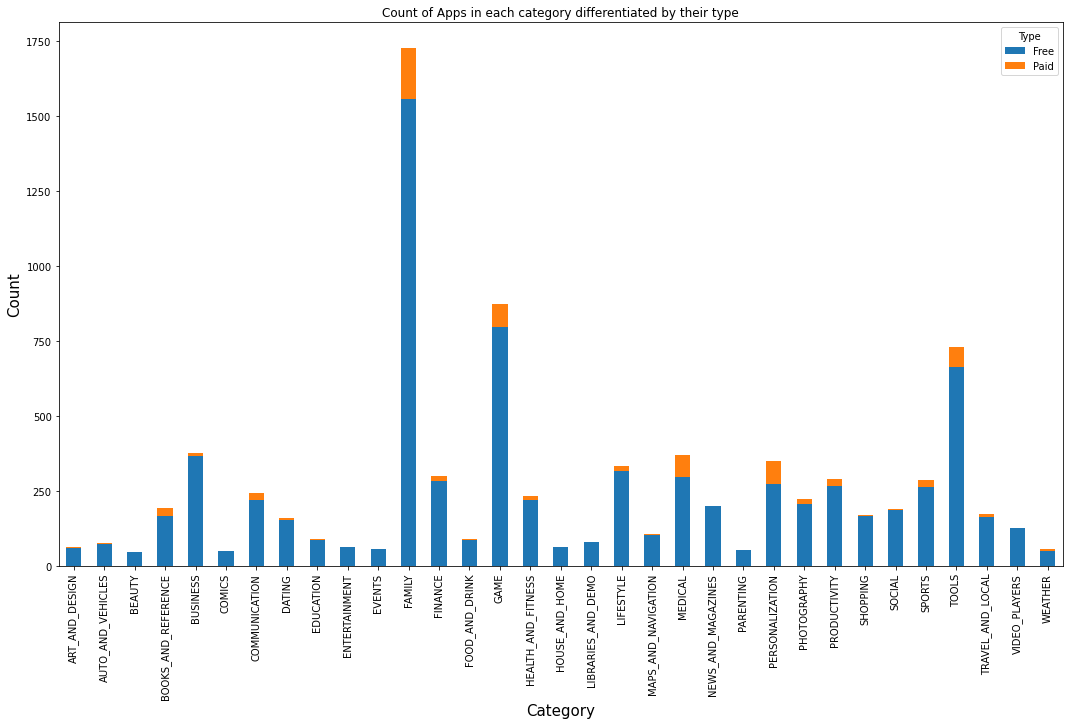

In [61]:
df_app_count.set_index('Category').plot(kind='bar',stacked=True,figsize=(18,10))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of Apps in each category differentiated by their type")
plt.show()

**Observation 4- The bar plot shows clearly that majority of categories contains free app for download. The most paid apps availbale for download are in Family, Game, Tools and Medical category**

##Question-4(b): Let us examine the Free and Paid Apps downloads according to Category

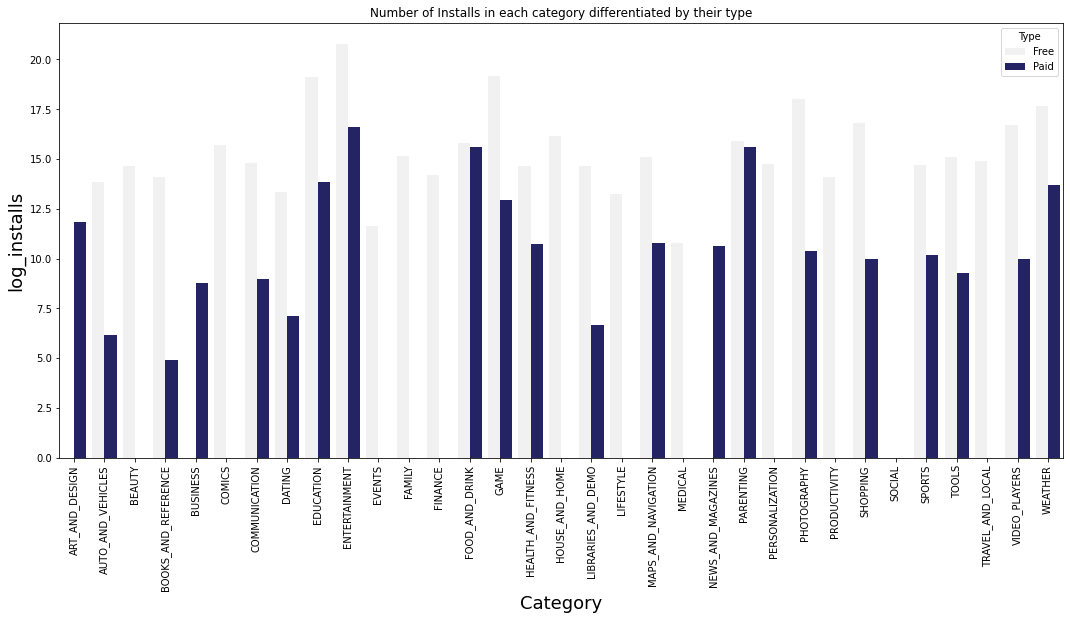

In [62]:
category_type_install=df_ps_data.groupby(["Category","Type"]).agg({"log_installs":"mean"}).reset_index()
most_category_download=pd.DataFrame(category_type_install)

# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(18,8))
sns.barplot(x="Category",y="log_installs",hue="Type",data=most_category_download, color="midnightblue")
plt.xlabel("Category", fontsize=18)
plt.ylabel("log_installs", fontsize=18)
plt.title("Number of Installs in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

**Observation 4**- **It is pretty evident from above plot that free apps are installed by user are high when compared to paid apps**

##Question 5- Let's now dive into the Rating section and try to establish some meaningful insights.

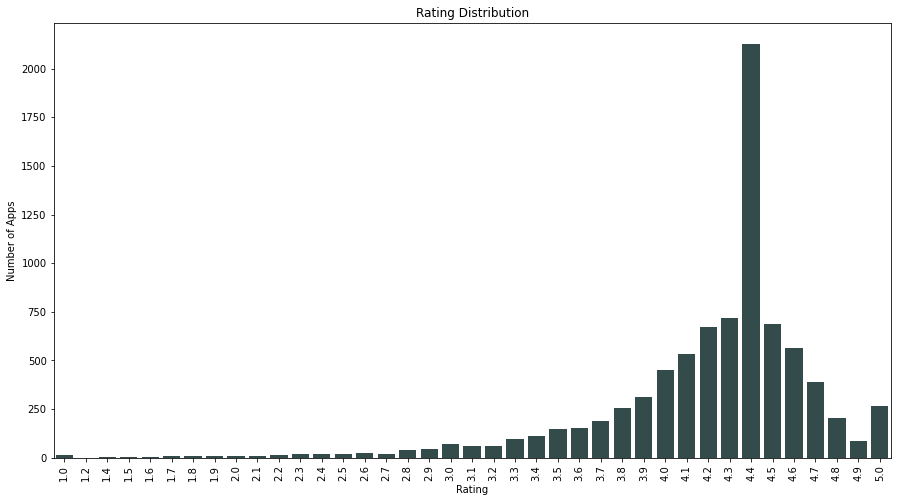

In [63]:
# Distribution of Rating
plt.figure(figsize=(15,8))
sns.countplot(x='Rating',data=df_ps_data, color="darkslategray")
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

**Observation 5**- **Well well as an honest user must review seems people had taken that fact too seriously as most of the apps are rated above 4 and in the range of 4-4.6**

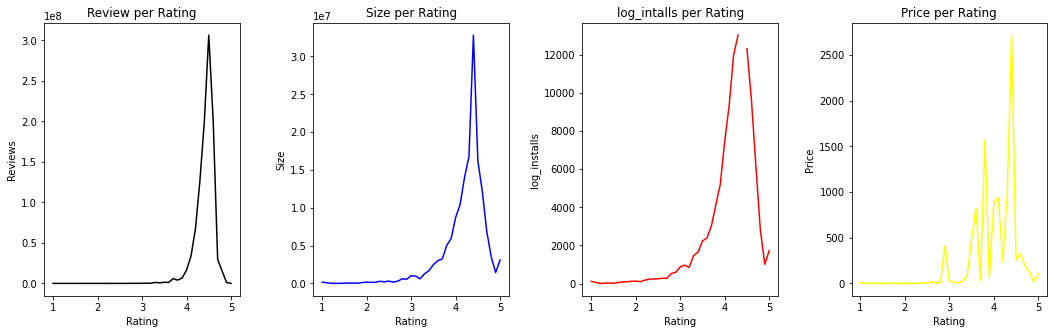

In [64]:
# Now plotting graphs of reviews, size, installs and price per rating
rating_apps = df_ps_data.groupby('Rating').sum().reset_index()
fig, axes = plt.subplots(1,4,figsize=(15,5))

axes[0].plot(rating_apps['Rating'],rating_apps['Reviews'],'black')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Review per Rating')

axes[1].plot(rating_apps['Rating'],rating_apps['Size'],'blue')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size per Rating')

axes[2].plot(rating_apps['Rating'],rating_apps['log_installs'],'red')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('log_installs')
axes[2].set_title('log_intalls per Rating')

axes[3].plot(rating_apps['Rating'],rating_apps['Price'],'yellow')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price per Rating')

plt.tight_layout(pad=2)
plt.show()


**Observation 5- From the above plotting, we can say that most the apps with higher rating range of 4-4.7 are having high amount of reviews, size, and installs.**
**In terms of price, it doesn't reflect a direct relationship with rating, as could see a fluctuation even at the range of high rating**

##Correlation- The corr() method calculates the relationship between each column in your data set.

In [65]:
 df_ps_data.corr()

,Rating,Reviews,Size,Installs,Price,log_installs
Rating,1.000000,0.056551,0.033757,0.035257,-0.018070,-0.057110
Reviews,0.056551,1.000000,0.176255,0.597289,-0.008649,0.226569
Size,0.033757,0.176255,1.000000,0.133988,-0.022141,0.295360
Installs,0.035257,0.597289,0.133988,1.000000,-0.010148,0.266387
Price,-0.018070,-0.008649,-0.022141,-0.010148,1.000000,-0.037201
log_installs,-0.057110,0.226569,0.295360,0.266387,-0.037201,1.000000


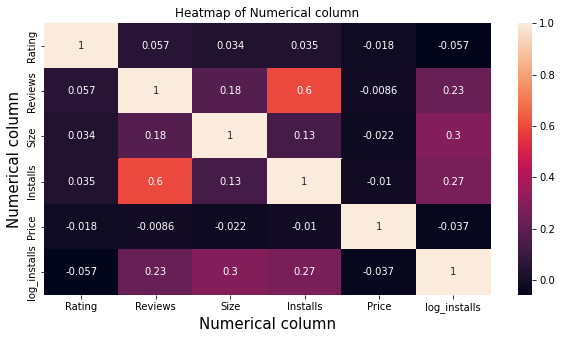

In [66]:
# heatmap syntax(always ploted on correlation)
plt.figure(figsize=(10,5))
plt.title("Heatmap of Numerical column")
sns.heatmap(df_ps_data.corr(),annot=True,robust=True)
plt.xlabel("Numerical column", fontsize=15)
plt.ylabel("Numerical column", fontsize=15)
plt.show();

**Observation 6- From above heat map we can clearly say that Install and Review are correlated**

## Now Its's time to play with some sentiments of our data. Yes, you read it right Data too have sentiments.

##Let's find out what their's sentiments made up of..

## Merging both Playstore and User Review Data Sets

In [67]:
merged_df = df_ps_data.merge(df_user_rew, on='App')

**In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1]**

## Sentiments Review in Pie Chart

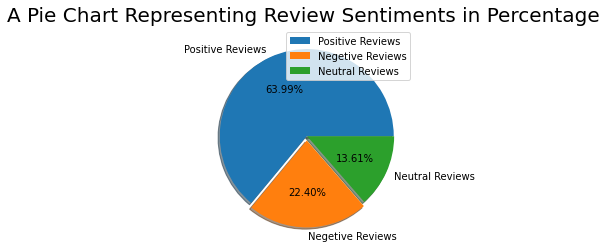

In [68]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Review Sentiments in Percentage ', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()


**Observation 7-** **Alas, Positive Reviews from the positive mentality of Users.**

## Histogram of Subjectivity

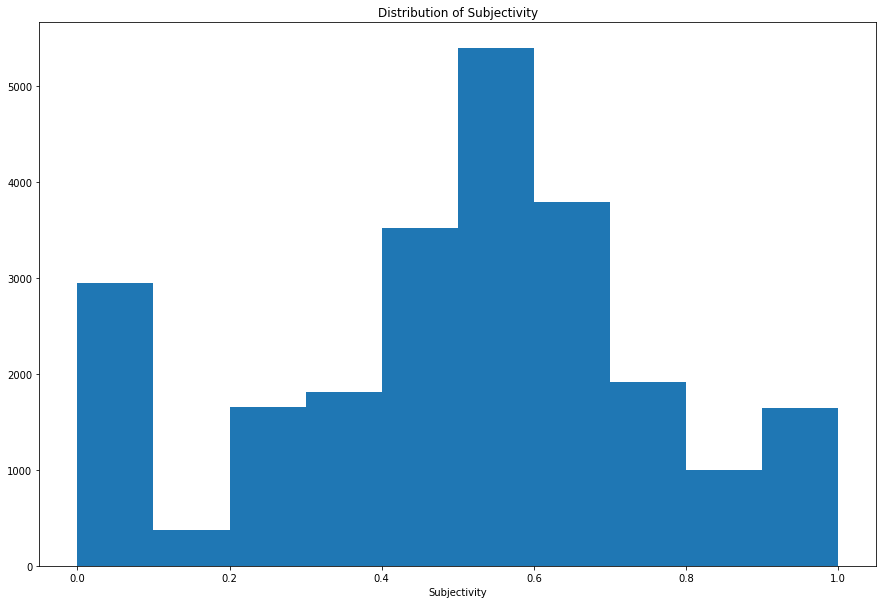

In [69]:
plt.figure(figsize=(15,10))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

**Observation 7-** **It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that macimum number of users give reviews to the applications, according to their experience**

## Does Sentiment Subjectivity proportional to Sentiments Polarity?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


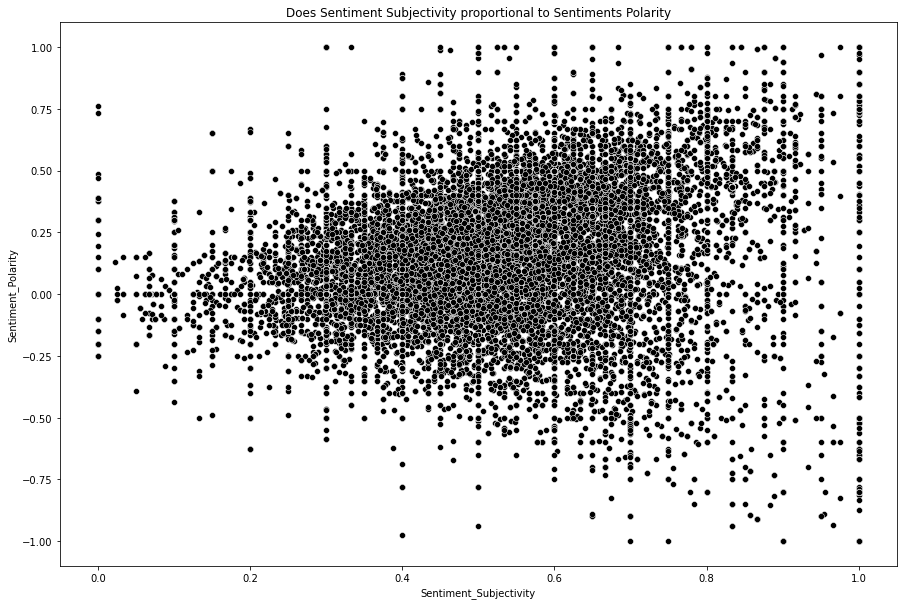

In [70]:
plt.figure(figsize=(15,10))
sns.scatterplot(merged_df['Sentiment_Subjectivity'],merged_df['Sentiment_Polarity'],color="black")
plt.title("Does Sentiment Subjectivity proportional to Sentiments Polarity")
plt.show()

**Observation 7-** **From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.**

## Finally a Poster for our Playstore Data

In [71]:
review_notnull = df_user_rew[df_user_rew['Translated_Review'].notnull()]


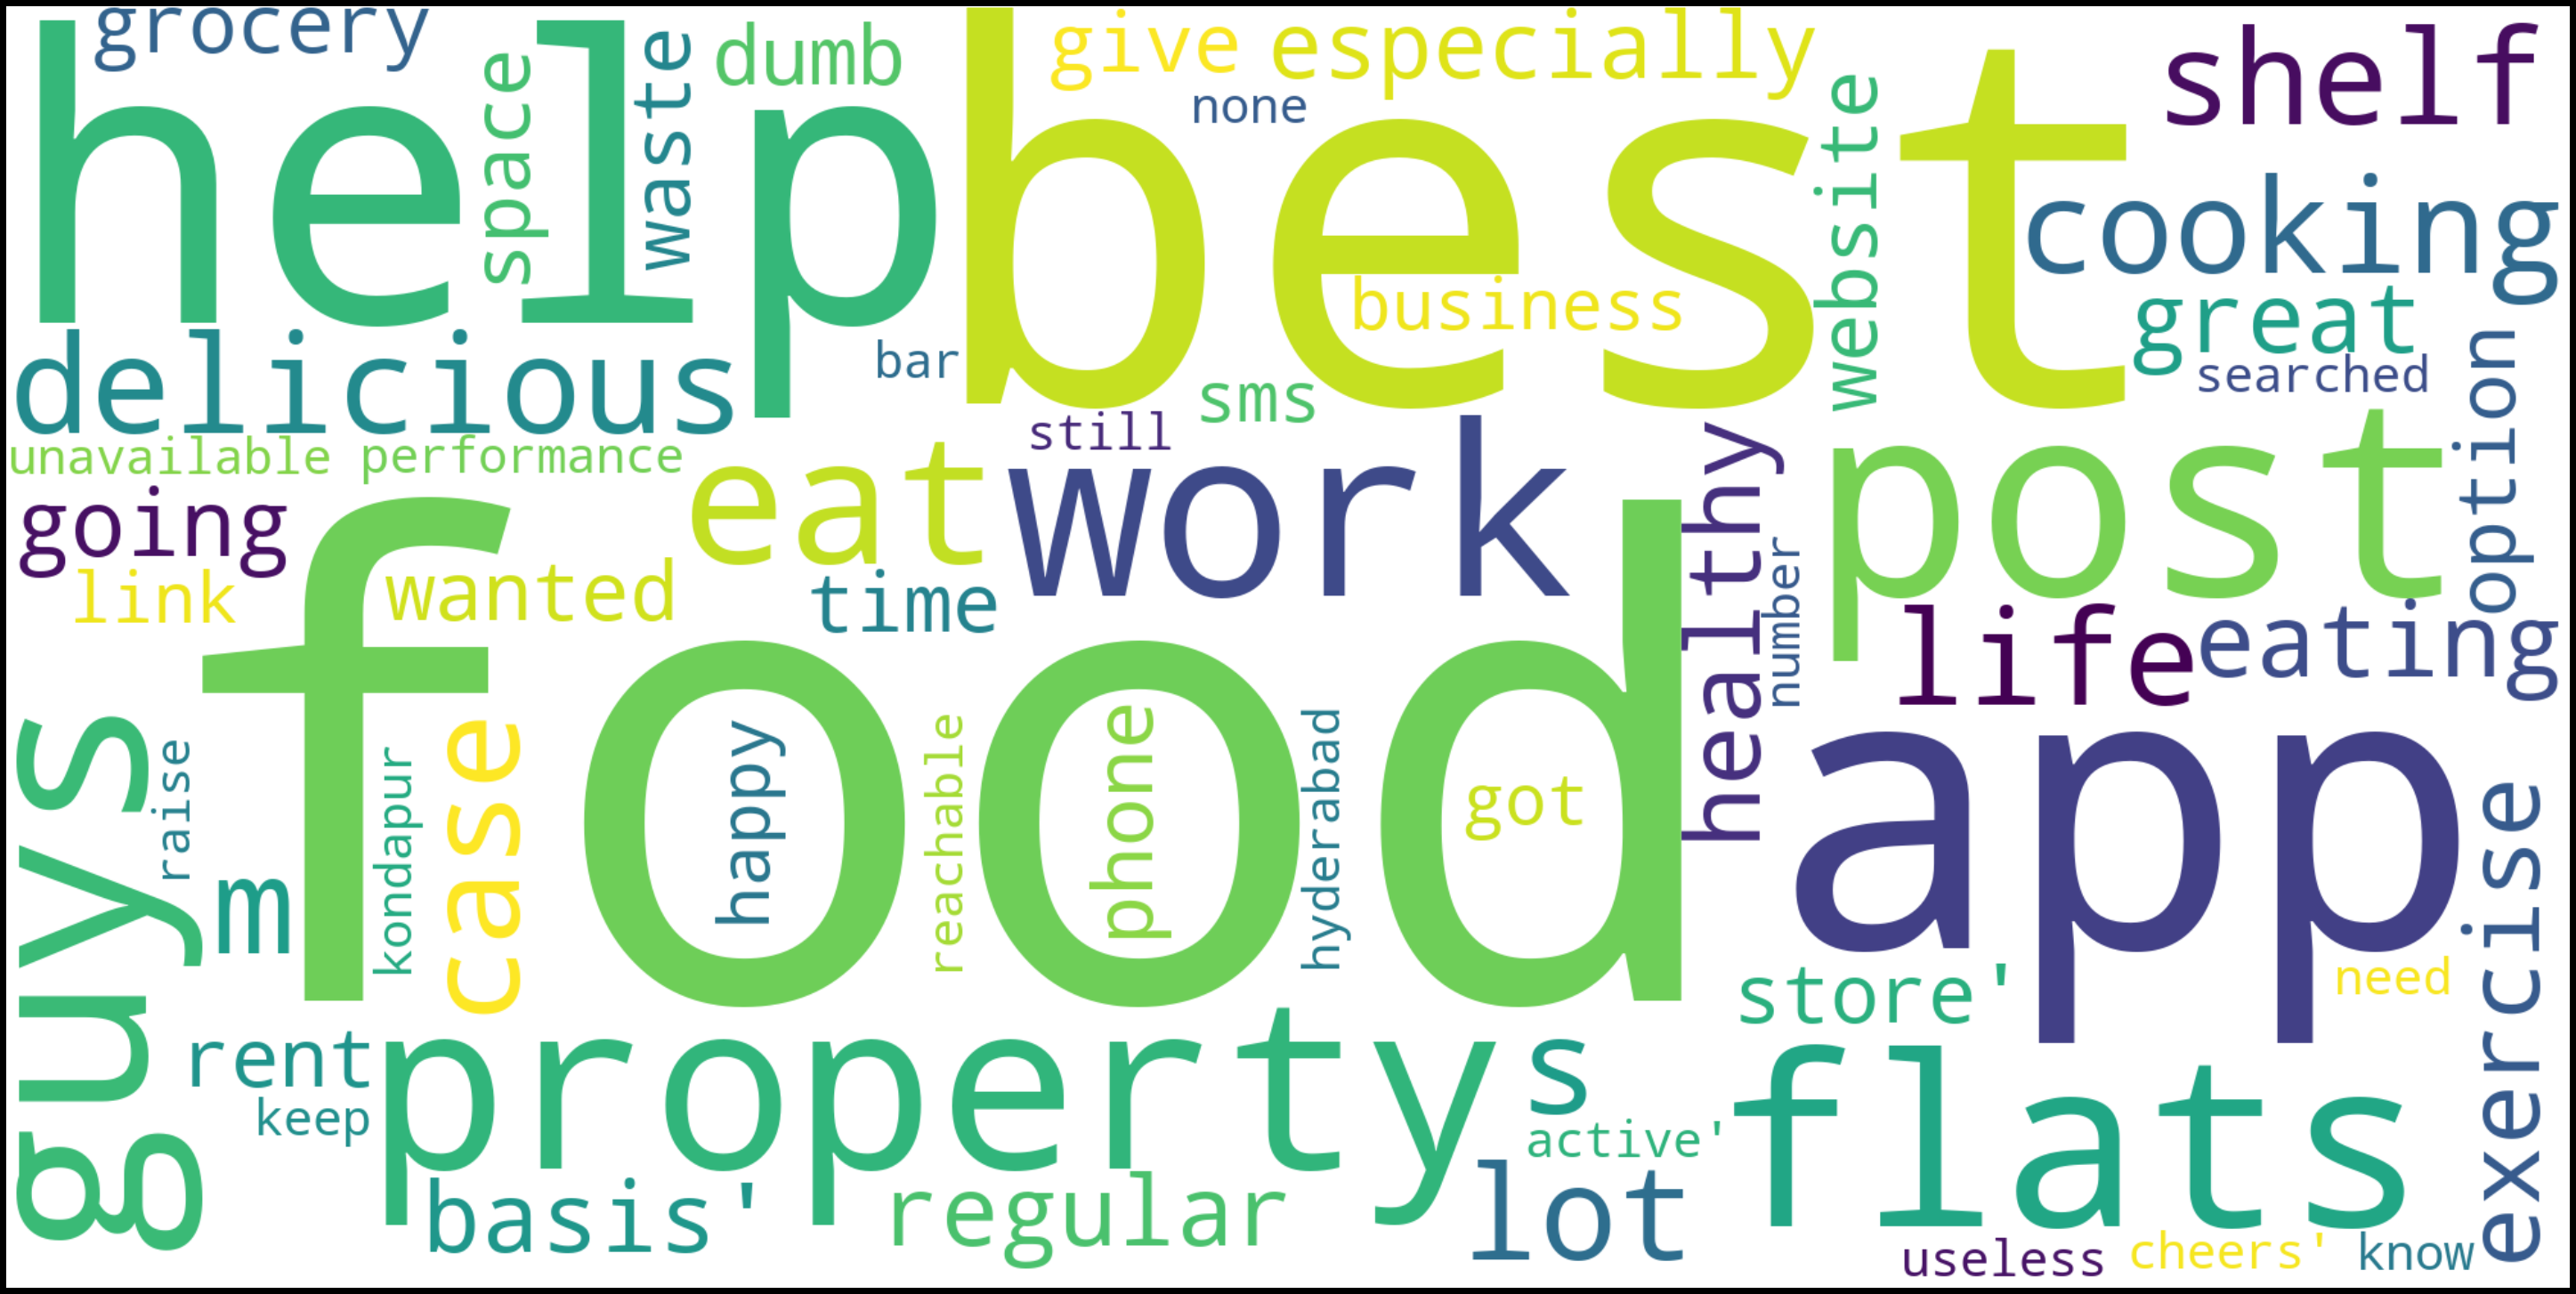

In [72]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = review_notnull.Translated_Review.values
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text).lower())
fig = plt.figure(
    figsize = (40,30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Just for the basic knowledge we are going to find answers of most trending question in Google Playstore

In [73]:
# Top-5 apps on the basis of installs?
top_apps = df_ps_data.sort_values(by=['Installs'], ascending=False) 
top_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13000.0,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,29.897353
1654,Subway Surfers,GAME,4.5,27722264.0,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,29.897353
3255,SHAREit - Transfer & Share,TOOLS,4.6,7790693.0,17000.0,500000000,Free,0.0,Everyone,Tools,"July 30, 2018",4.5.28_ww,4.1 and up,28.897353
1661,Temple Run 2,GAME,4.3,8118609.0,62000.0,500000000,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up,28.897353
3473,Dropbox,PRODUCTIVITY,4.4,1861310.0,61000.0,500000000,Free,0.0,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device,28.897353


In [74]:
#Top-5 apps that are reviewed?
top_apps = df_ps_data.sort_values(by=['App','Category','Rating'])[['Reviews']].sum().reset_index(), 
top_apps = df_ps_data.sort_values(by=['Reviews'],ascending=False) 
top_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
1670,Clash of Clans,GAME,4.6,44891723.0,98000.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,26.575425
1654,Subway Surfers,GAME,4.5,27722264.0,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,29.897353
1660,Clash Royale,GAME,4.6,23133508.0,97000.0,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,26.575425
1655,Candy Crush Saga,GAME,4.4,22426677.0,74000.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,28.897353
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922.0,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up,28.897353


In [75]:
# Let's come to the Most Expensive Apps
most_exp = df_ps_data.sort_values(by=['Price'],ascending=False)
most_exp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,13.287712
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,12.287712
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,9.965784
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.7,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,12.287712
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,16.609640


In [76]:
df_ps_data.to_csv('/content/drive/MyDrive/ALMABETTER/Modules/Topics/Capstone EDA/Play Store cleaned.csv',index=False)

## Conclusion and Inferences: At last here comes the happy ending.
**The Google Play Store Apps report provides some useful insights regarding the trending of the apps in the play store.**

1. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. 

2. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

3. Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. 

4. There are some spikes in term of size and price but it shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. 

5. Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store (which are mostly from FINANCE and LIFESTYLE). 

6. As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.